<a href="https://colab.research.google.com/github/BigSekas/WB_mirea/blob/main/Workbook3_Mironov_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1.3.1**

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.


1 точка: 2 3 7
2 точка: 6 8 2
3 точка: 5 4 1
4 точка: 8 8 8


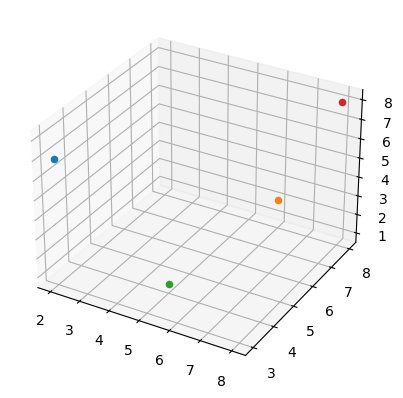

Евклидово расстояние попарно между всеми точками: 
Расстояние между 2 и 1 точками = 8.12403840463596
Расстояние между 3 и 1 точками = 6.782329983125268
Расстояние между 3 и 2 точками = 4.242640687119285
Расстояние между 4 и 1 точками = 7.874007874011811
Расстояние между 4 и 2 точками = 6.324555320336759
Расстояние между 4 и 3 точками = 8.602325267042627
Квадрат евклидова расстояния попарно между всеми точками: 
Расстояние между 2 и 1 точками = 66.00000000000001
Расстояние между 3 и 1 точками = 46.0
Расстояние между 3 и 2 точками = 17.999999999999996
Расстояние между 4 и 1 точками = 62.0
Расстояние между 4 и 2 точками = 40.00000000000001
Расстояние между 4 и 3 точками = 74.0
Квадрат расстояния Чебышева попарно между всеми точками: 
Расстояние между 2 и 1 точками = 5.0
Расстояние между 3 и 1 точками = 6.0
Расстояние между 3 и 2 точками = 4.0
Расстояние между 4 и 1 точками = 6.0
Расстояние между 4 и 2 точками = 6.0
Расстояние между 4 и 3 точками = 7.0
Квадрат расстояния Хемминга попарно м

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


points = []
for i in range(4):
    x, y, z = map(int, input(f"{i+1} точка: ").split())
    points.append(np.array((x, y, z)))
    ax.scatter(x, y, z)

plt.show()

#evk_distance
print("Евклидово расстояние попарно между всеми точками: ")
for i in range(4):
    for j in range(i):
        print(f"Расстояние между {i + 1} и {j + 1} точками =", np.linalg.norm(points[i] - points[j]))


print("Квадрат евклидова расстояния попарно между всеми точками: ")
for i in range(4):
    for j in range(i):
        print(f"Расстояние между {i + 1} и {j + 1} точками =", np.linalg.norm(points[i] - points[j])**2)


print("Квадрат расстояния Чебышева попарно между всеми точками: ")
for i in range(4):
    for j in range(i):
        print(f"Расстояние между {i + 1} и {j + 1} точками =", np.linalg.norm(points[i] - points[j], ord = np.inf))


print("Квадрат расстояния Хемминга попарно между всеми точками: ")
for i in range(4):
    for j in range(i):
        print(f"Расстояние между {i + 1} и {j + 1} точками =", np.linalg.norm(points[i] - points[j], ord = 1))

**Задание 1.3.2**

Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.

In [ ]:
main_matr = np.zeros((5, 5))
main_matr = main_matr + np.arange(5)
print(*main_matr, sep = '\n')

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


**Задание 2.3.1**

Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

KNeighborsClassifier(n_neighbors=1)
accuracy: 1.0
KNeighborsClassifier()
accuracy: 1.0
KNeighborsClassifier(n_neighbors=10)
accuracy: 1.0


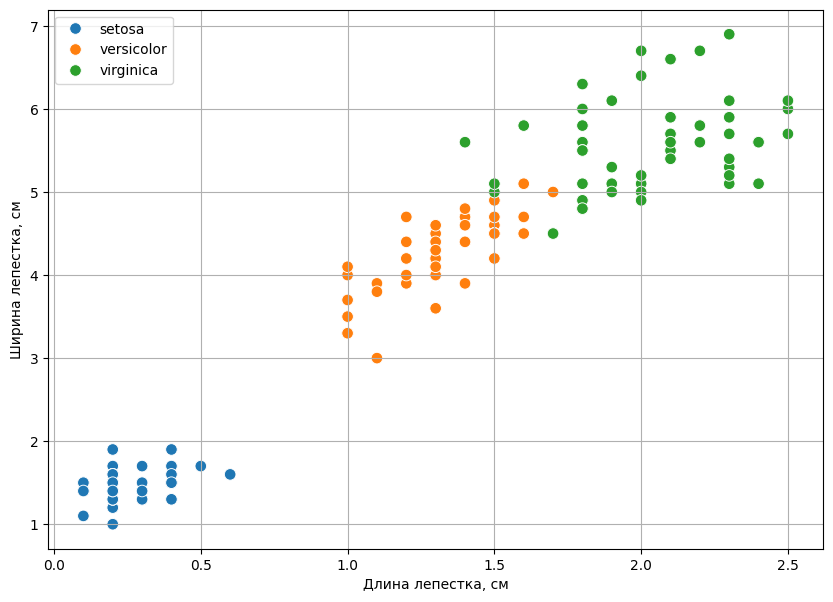

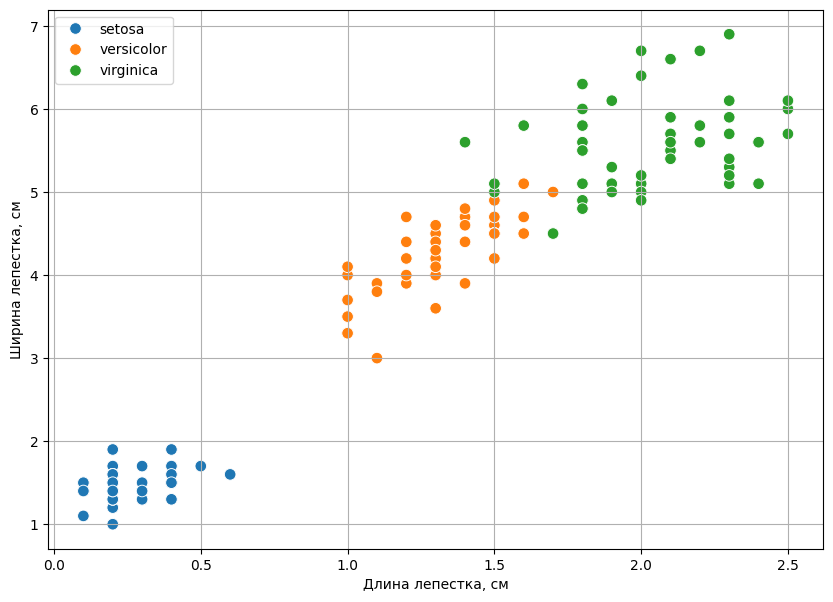

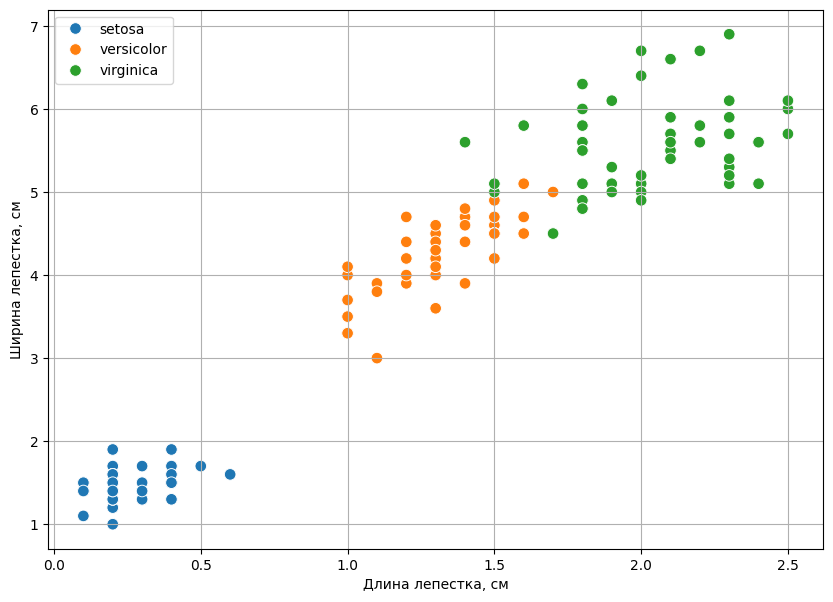

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size=0.15
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


def init_model(k, X_train, y_train, X_test):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(model)
    y_pred = model.predict(X_test)
    return y_pred


def graph(y_test, X_test, y_pred):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.legend(loc=2)
    plt.grid()
    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)


y_pred = init_model(1, X_train, y_train, X_test)

graph(y_test, X_test, y_pred)
print((f'accuracy: {accuracy_score(y_pred, y_test) :.3}'))
y_pred = init_model(5, X_train, y_train, X_test)

graph(y_test, X_test, y_pred)
print((f'accuracy: {accuracy_score(y_pred, y_test) :.3}'))
y_pred = init_model(10, X_train, y_train, X_test)

graph(y_test, X_test, y_pred)
print((f'accuracy: {accuracy_score(y_pred, y_test) :.3}'))

```
При n = 1 алгоритм неустойчив к шумовым выбросам: он дает ошибочные
классификации не только на самих объектах-выбросах, но и на ближайших
к ним объектах других классов. Если же количество соседей n = j (размерности выборки),
алгоритм достаточно устойчив.

Оптимизация чистоты алгоритма:
Как правило объекты не являются равноценными, и среди нихх могут находиться
эталонные объекты. Это такие объекты, что если классифицируемый объект близок к ним,
то, скорее всего, принадлежит тому же классу эталонных объектов.
Также существуют неинформативные элементы, такие элементы можно безболезненно выбросить.

На сверхбольших выборках, когда количество соседей k >> j (размерности выборки),
перечисленные выше особенности помогут оптимизировать алгоритм, а именно
хранение всех обучающих объектов (так как он хранит их всех)
```


In [ ]:
import pandas as pd

dataframe = pd.DataFrame({"оценка": ["низкая", "низкая", "средняя", "средняя", "высокая"]})
scale_mapper = {"низкая":1, "средняя":2, "высокая":3}

dataframe["оценка"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

**Задание 3.3.2**

Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"красный" : 1, "синий": 4},
            {"красный" : 3, "синий": 3},
             {"красный" : 4, "зеленый": 3},
             {"красный" : 1, "зеленый": 3}]

dictvectorizer = DictVectorizer(sparse = False)
features = dictvectorizer.fit_transform(data_dict)
print(*features, sep = '\n')

[0. 1. 4.]
[0. 3. 3.]
[3. 4. 0.]
[3. 1. 0.]
